In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


In [2]:
sns.set()

In [3]:
df= pd.read_csv('Data_analyst_cleaned.csv')


FileNotFoundError: ignored

In [ ]:
df.head()


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Job_Title,Salary_Estimate,Job_Description,Rating,Company Name,Location,...,Database_Management,Excel,job_simp,Seniority,desc_len,Competitors_count,Min_salary_hr,Max_salary_hr,avg_salary_hr,Rating_groups
0,0,0,0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",...,1,0,data analyst,NaN,7057,1,18.5,33.0,25.75,"(3.0, 4.0]"
1,1,1,1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",...,1,1,data analyst,NaN,4702,1,18.5,33.0,25.75,"(3.0, 4.0]"
2,2,2,2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY",...,0,1,data analyst,senior,4688,1,18.5,33.0,25.75,"(3.0, 4.0]"
3,3,3,3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY",...,0,0,data analyst,NaN,5249,1,18.5,33.0,25.75,"(4.0, 5.0]"
4,4,4,4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",...,1,1,data analyst,NaN,3376,1,18.5,33.0,25.75,"(3.0, 4.0]"


In [ ]:
df.columns


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Min_salary', 'Max_salary', 'max_salary', 'avg_salary',
       'Avg_salary', 'Job_state', 'Job_city', 'headquarters_city',
       'Same_state_hq_jl', 'Age', 'python_jd', 'Sql', 'aws', 'visualization',
       'Project_Management', 'Database_Management', 'Excel', 'job_simp',
       'Seniority', 'desc_len', 'Competitors_count', 'Min_salary_hr',
       'Max_salary_hr', 'avg_salary_hr', 'Rating_groups'],
      dtype='object')

In [ ]:
def title_simplifier(title):
    if 'engineer' in title.lower():
        return 'Data Engineer'
   
    elif ' business analyst' in title.lower():
        return 'Business analyst'
    elif 'scientist' in title.lower():
        return 'Data Scientist'
    elif 'manager'in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'Director'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'quantitative' in title.lower():
        return 'quantitative analyst'
    
    elif 'operations' in title.lower():
        return 'operations analyst'
    elif 'marketing' in title.lower():
        return 'marketing analyst'
#     else :
#         return 'Na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'Sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'Junior' in title.lower() or 'junior' in title.lower():
        return 'junior'
#     else :
#         return 'na'
    

In [ ]:
df['job_simp'] = df['Job_Title'].apply(title_simplifier) 


In [ ]:
df.job_simp.value_counts()

data analyst          1609
Business analyst        40
Data Engineer           39
manager                 26
operations analyst      18
Data Scientist          18
Director                 5
Name: job_simp, dtype: int64

In [ ]:
df['Seniority'] = df['Job_Title'].apply(seniority)
df.Seniority.value_counts(dropna = False)


NaN       1698
senior     481
junior      73
Name: Seniority, dtype: int64

In [ ]:
df['Job_state']= df.Job_state.apply(lambda x: x.strip() if x.strip().lower() != 'arapahoe' else 'CO')
df.Job_state.value_counts() 

CA    626
TX    394
NY    345
IL    164
PA    114
AZ     97
CO     96
NC     90
NJ     86
WA     53
VA     48
OH     35
UT     33
FL     27
IN     23
DE     11
GA      4
SC      3
KS      3
Name: Job_state, dtype: int64

In [ ]:
df.Job_state.value_counts() 

CA    626
TX    394
NY    345
IL    164
PA    114
AZ     97
CO     96
NC     90
NJ     86
WA     53
VA     48
OH     35
UT     33
FL     27
IN     23
DE     11
GA      4
SC      3
KS      3
Name: Job_state, dtype: int64

In [ ]:
df['desc_len'] = df['Job_Description'].apply(lambda x : len(x))


In [ ]:
df['Competitors_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!= -1 else 0)


In [ ]:
df['Min_salary_hr']= df['Min_salary'].div(2)


In [ ]:
df['Max_salary_hr']= df['Max_salary'].div(2)


In [ ]:
df['avg_salary_hr'] = df['avg_salary'].div(2)

In [ ]:
df.describe()


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Rating,Founded,Min_salary,Max_salary,max_salary,avg_salary,...,aws,visualization,Project_Management,Database_Management,Excel,desc_len,Competitors_count,Min_salary_hr,Max_salary_hr,avg_salary_hr
count,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,...,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000
mean,1125.500000,1125.500000,1125.545737,1125.545737,3.160080,1398.255329,54.266874,89.979130,89.979130,72.123002,...,0.130107,0.360568,0.542185,0.423623,0.600799,3119.808171,1.377886,27.133437,44.989565,36.061501
std,650.240725,650.240725,650.316366,650.316366,1.665393,902.040151,19.575375,29.315605,29.315605,23.600734,...,0.336495,0.480272,0.498328,0.494242,0.489843,1858.598883,0.747993,9.787687,14.657803,11.800367
min,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,24.000000,38.000000,38.000000,33.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,12.000000,19.000000,16.750000
25%,562.750000,562.750000,562.750000,562.750000,3.100000,-1.000000,41.000000,70.000000,70.000000,58.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1760.750000,1.000000,20.500000,35.000000,29.000000
50%,1125.500000,1125.500000,1125.500000,1125.500000,3.600000,1979.000000,50.000000,87.000000,87.000000,69.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,2881.500000,1.000000,25.000000,43.500000,34.500000
75%,1688.250000,1688.250000,1688.250000,1688.250000,4.000000,2002.000000,64.000000,104.000000,104.000000,80.500000,...,0.000000,1.000000,1.000000,1.000000,1.000000,4118.000000,1.000000,32.000000,52.000000,40.250000
max,2251.000000,2251.000000,2252.000000,2252.000000,5.000000,2019.000000,113.000000,190.000000,190.000000,150.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,18664.000000,4.000000,56.500000,95.000000,75.000000


In [ ]:
df.columns


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Min_salary', 'Max_salary', 'max_salary', 'avg_salary',
       'Avg_salary', 'Job_state', 'Job_city', 'headquarters_city',
       'Same_state_hq_jl', 'Age', 'python_jd', 'Sql', 'aws', 'visualization',
       'Project_Management', 'Database_Management', 'Excel', 'job_simp',
       'Seniority', 'desc_len', 'Competitors_count', 'Min_salary_hr',
       'Max_salary_hr', 'avg_salary_hr', 'Rating_groups'],
      dtype='object')

<AxesSubplot:>

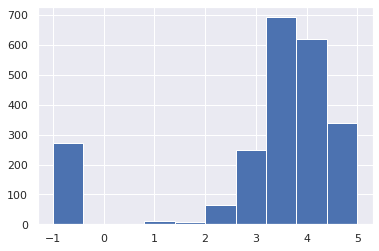

In [ ]:
df.Rating.hist()

<AxesSubplot:>

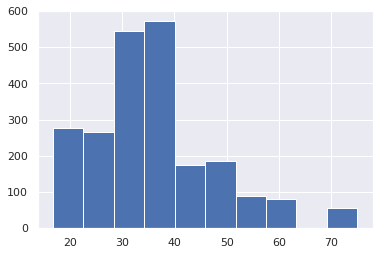

In [ ]:
df.avg_salary_hr.hist()

<AxesSubplot:>

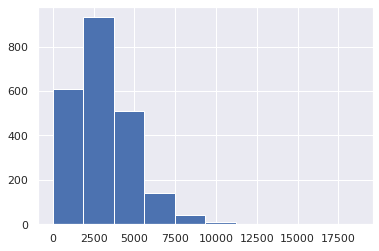

In [ ]:
df.desc_len.hist()


In [ ]:
df[['Age', 'avg_salary_hr', 'Rating', 'desc_len']].corr()

,Age,avg_salary_hr,Rating,desc_len
Age,1.000000,-0.075872,0.184380,0.255117
avg_salary_hr,-0.075872,1.000000,0.004301,-0.033643
Rating,0.184380,0.004301,1.000000,-0.018666
desc_len,0.255117,-0.033643,-0.018666,1.000000


<AxesSubplot:>

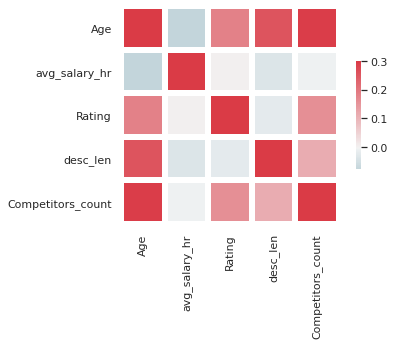

In [ ]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['Age', 'avg_salary_hr', 'Rating', 'desc_len','Competitors_count']].corr(), vmax=.3, center=0, cmap=cmap,square=True, linewidth=5, cbar_kws={"shrink":.5})

In [ ]:
df.columns


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Min_salary', 'Max_salary', 'max_salary', 'avg_salary',
       'Avg_salary', 'Job_state', 'Job_city', 'headquarters_city',
       'Same_state_hq_jl', 'Age', 'python_jd', 'Sql', 'aws', 'visualization',
       'Project_Management', 'Database_Management', 'Excel', 'job_simp',
       'Seniority', 'desc_len', 'Competitors_count', 'Min_salary_hr',
       'Max_salary_hr', 'avg_salary_hr', 'Rating_groups'],
      dtype='object')

In [ ]:
df_variables= df[['Location','Headquarters','Size','Type_of_ownership','Industry', 'Sector', 'Revenue', 'Job_state',
       'Job_city', 'headquarters_city','Same_state_hq_jl', 'python_jd',
        'aws', 'Excel','Seniority' , 'Company Name','visualization', 'Project_Management', 'Database_Management']]

graphs for Location: total= 253


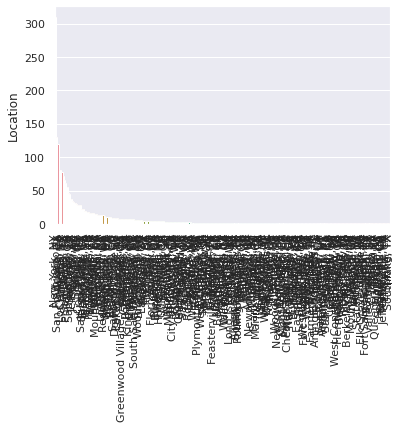

graphs for Headquarters: total= 483


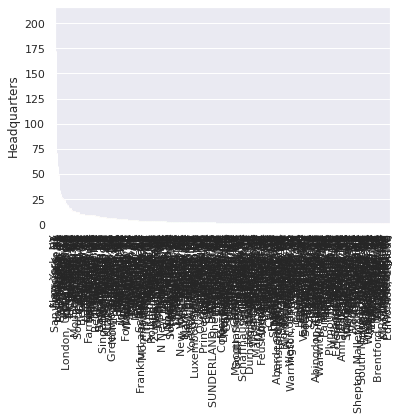

graphs for Size: total= 9


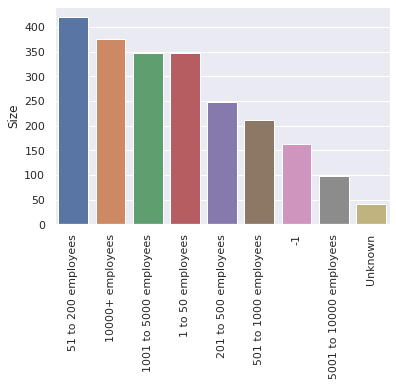

graphs for Type_of_ownership: total= 15


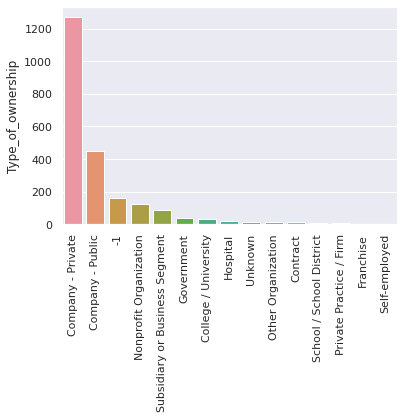

graphs for Industry: total= 89


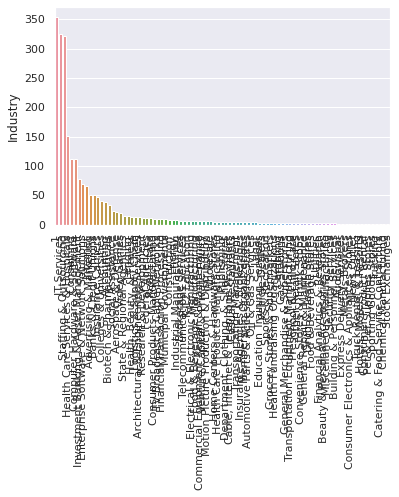

graphs for Sector: total= 25


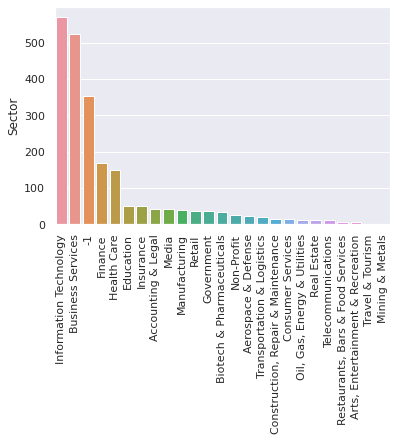

graphs for Revenue: total= 14


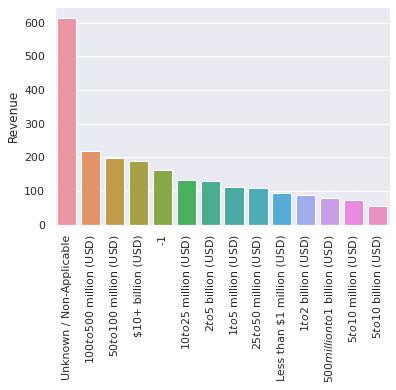

graphs for Job_state: total= 19


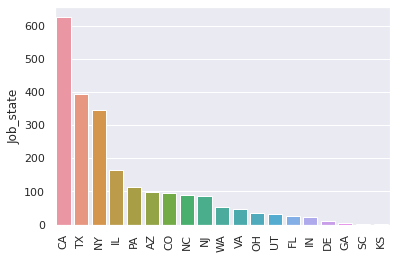

graphs for Job_city: total= 249


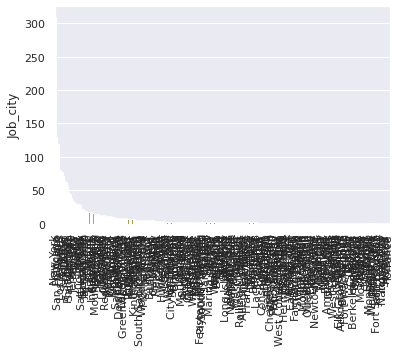

graphs for headquarters_city: total= 468


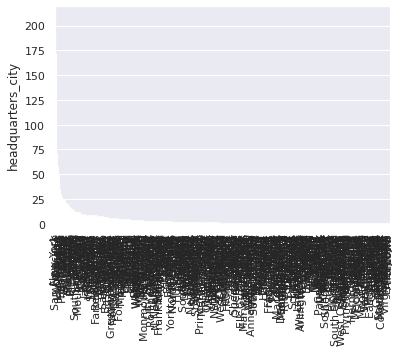

graphs for Same_state_hq_jl: total= 2


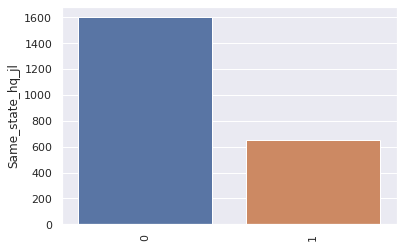

graphs for python_jd: total= 2


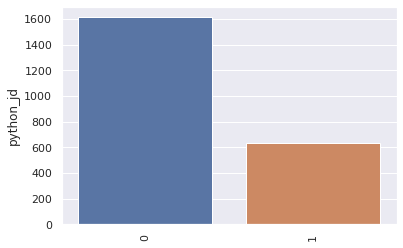

graphs for aws: total= 2


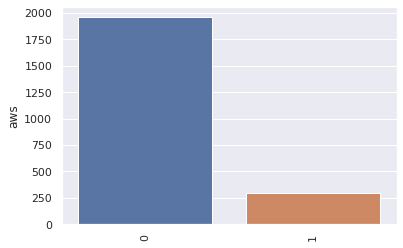

graphs for Excel: total= 2


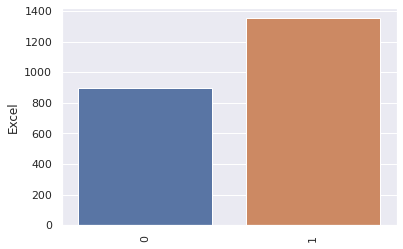

graphs for Seniority: total= 2


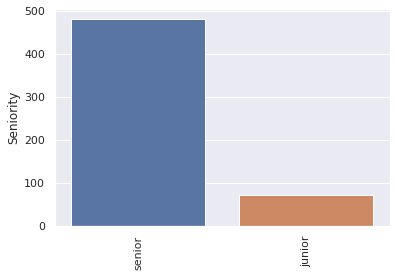

graphs for Company Name: total= 1513


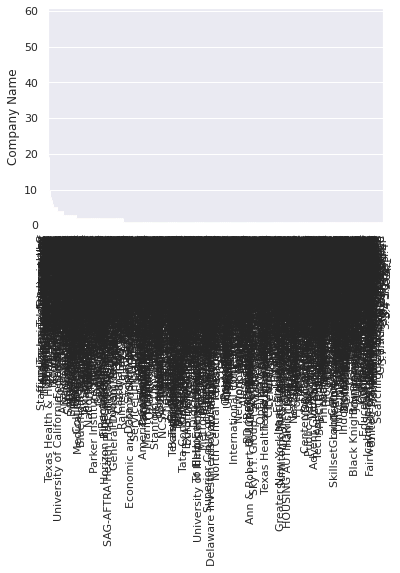

graphs for visualization: total= 2


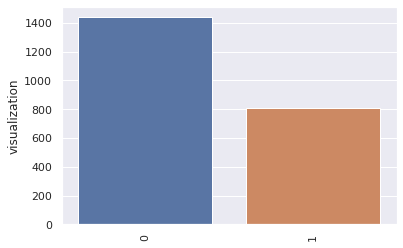

graphs for Project_Management: total= 2


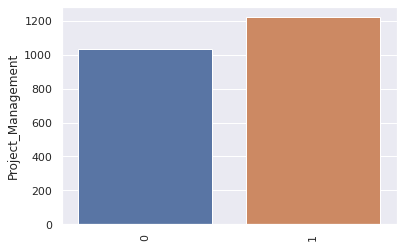

graphs for Database_Management: total= 2


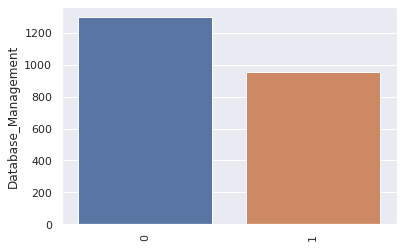

In [ ]:
for i in df_variables.columns:
    cat_num = df_variables[i].value_counts()
    print("graphs for %s: total= %d" % (i,len(cat_num)))
    chart= sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

graphs for Location: total= 20


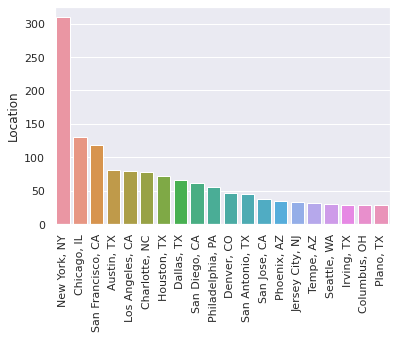

graphs for Headquarters: total= 20


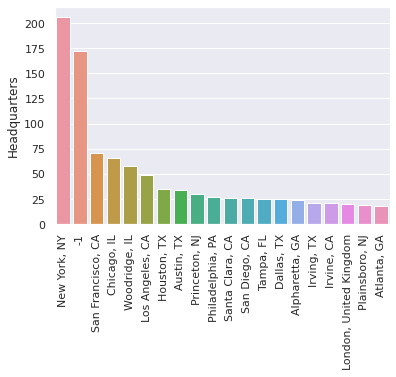

graphs for Job_city: total= 20


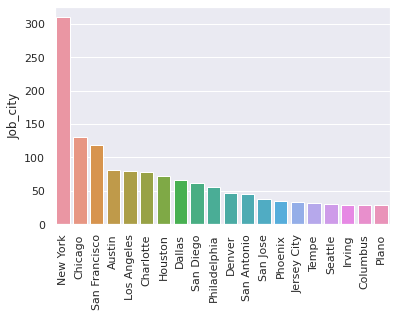

graphs for Industry: total= 20


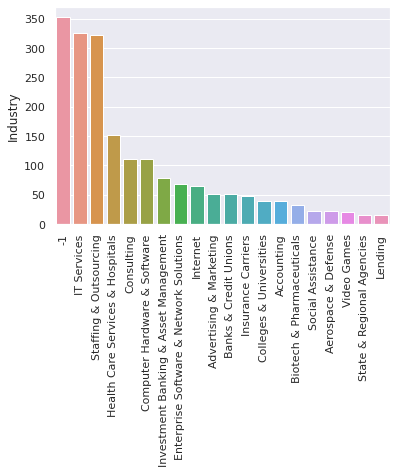

graphs for Company Name: total= 20


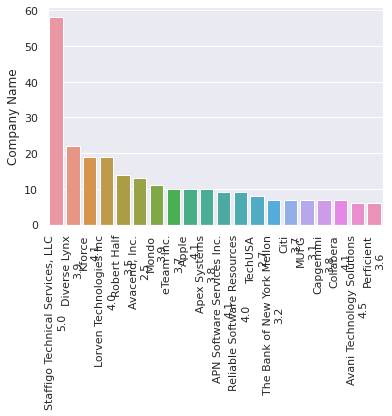

graphs for Size: total= 9


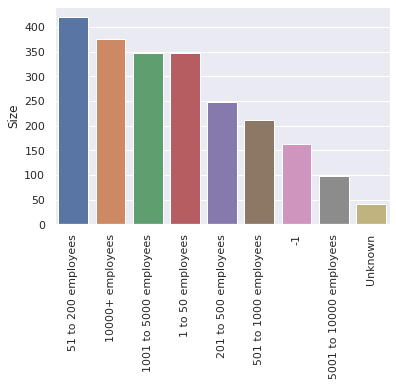

graphs for Type_of_ownership: total= 15


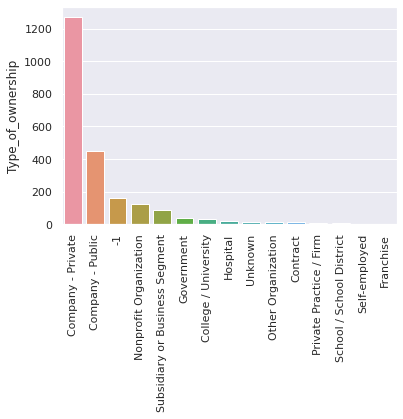

graphs for Revenue: total= 14


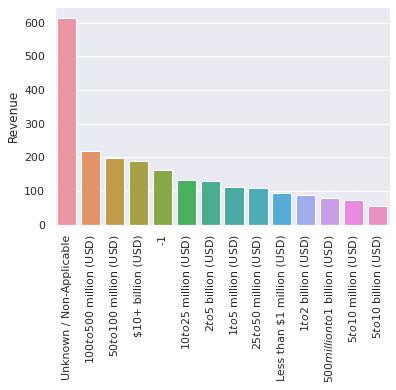

graphs for Job_state: total= 19


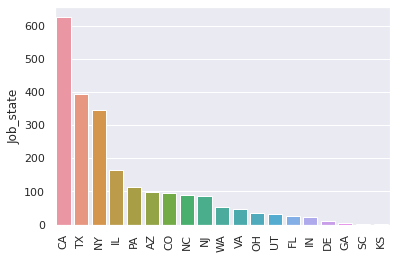

graphs for Job_city: total= 20


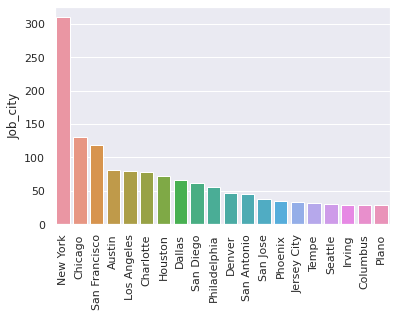

graphs for headquarters_city: total= 20


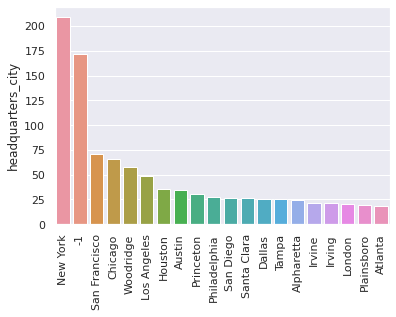

graphs for Same_state_hq_jl: total= 2


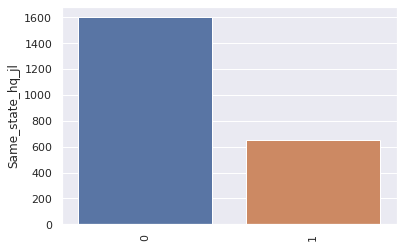

graphs for python_jd: total= 2


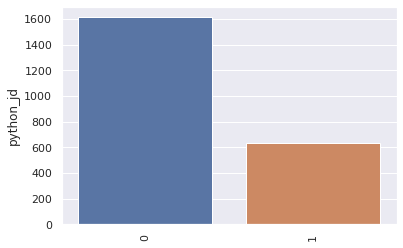

graphs for visualization: total= 2


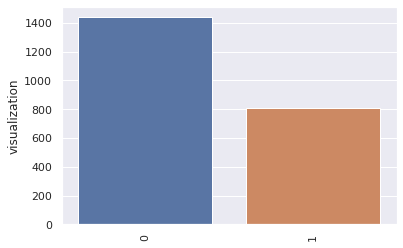

graphs for Project_Management: total= 2


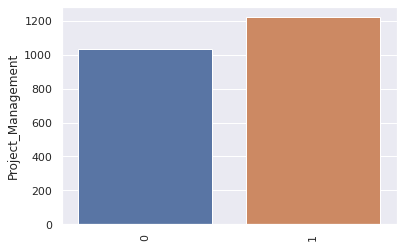

graphs for Database_Management: total= 2


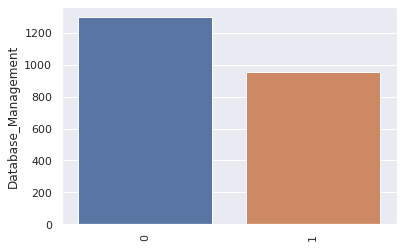

graphs for aws: total= 2


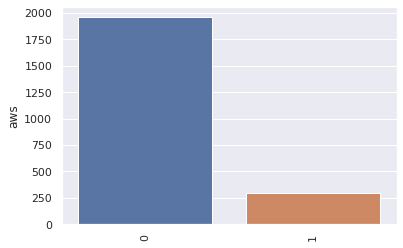

graphs for Excel: total= 2


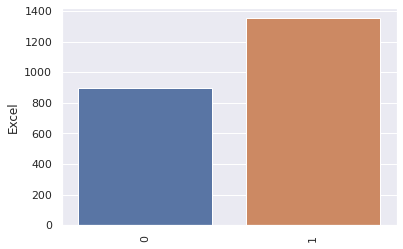

graphs for Seniority: total= 2


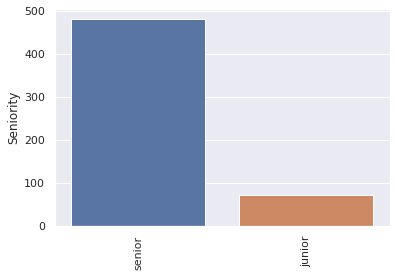

In [ ]:
for i in df_variables[['Location', 'Headquarters','Job_city', 'Industry','Company Name','Size','Type_of_ownership','Revenue', 'Job_state','Job_city', 'headquarters_city','Same_state_hq_jl', 'python_jd',
       'visualization', 'Project_Management', 'Database_Management', 'aws', 'Excel','Seniority' ]].columns:
    cat_num = df_variables[i].value_counts()[:20]
    print("graphs for %s: total= %d" % (i,len(cat_num)))
    chart= sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Job_Title', 'Salary_Estimate',
       'Job_Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type_of_ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply', 'Min_salary', 'min_salary', 'Max_salary',
       'max_salary', 'avg_salary', 'Avg_salary', 'Job_state', 'Job_city',
       'headquarters_city', 'Same_state_hq_jl', 'Age', 'python_jd', 'Sql',
       'aws', 'visualization', 'Project_Management', 'Database_Management',
       'Excel', 'job_simp', 'Seniority', 'desc_len', 'Competitors_count',
       'Min_salary_hr', 'Max_salary_hr', 'avg_salary_hr'],
      dtype='object')

In [ ]:
pd.pivot_table(df, index=['job_simp','Seniority'], values='avg_salary' )

avg_salary
job_simp           Seniority            
Business analyst   senior      69.843750
Data Engineer      senior      83.727273
Data Scientist     senior      83.642857
Director           senior      87.625000
data analyst       junior      62.901515
                   senior      74.980769
manager            senior      62.166667
operations analyst junior      75.500000
                   senior      74.300000

In [ ]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None )

pd.pivot_table(df, index=['Job_state','Job_city', 'job_simp'], values='avg_salary' ).sort_values('Job_state', ascending= False)

avg_salary
Job_state Job_city             job_simp                      
WA        Seattle              data analyst         63.960000
                               Director             78.000000
          Renton               data analyst         51.000000
          Redmond              data analyst         64.500000
                               Data Scientist       78.000000
          Kirkland             data analyst         78.000000
          Kent                 data analyst         51.000000
          Issaquah             data analyst         51.000000
          Bellevue             data analyst         51.000000
VA        Newport News         Business analyst     56.000000
          Chesapeake           Business analyst     80.500000
                               data analyst         56.000000
          Hampton              Data Engineer        80.500000
                               data analyst         56.000000
          Portsmouth           data analyst         66.500000
          Newport News         data analyst         56.000000
          Norfolk              data analyst         69.363636
          Suffolk              data analyst         56.000000
          Virginia Beach       data analyst         56.000000
UT        Salt Lake City       Business analyst     45.000000
          American Fork        data analyst         36.500000
          Draper               data analyst         36.500000
          Lehi                 Data Scientist       36.500000
                               data analyst         38.625000
          Riverton             data analyst         36.500000
          Salt Lake City       data analyst         37.066667
          Sandy                data analyst         36.500000
          West Jordan          data analyst         36.500000
          Salt Lake City       Data Engineer        36.500000
TX        Houston              Data Engineer        98.500000
          Coppell              data analyst         63.000000
          Grapevine            data analyst         56.166667
          Fort Worth           data analyst         64.222222
                               Data Engineer        68.000000
          Fort Sam Houston     data analyst         81.000000
          Farmers Branch       data analyst         63.000000
          Dallas               operations analyst   61.000000
                               data analyst         48.511628
                               Data Engineer        63.000000
          Austin               operations analyst   59.000000
          Cedar Park           data analyst         38.500000
          Carrollton           data analyst         63.000000
          Austin               manager              38.500000
                               data analyst         60.016129
                               Data Scientist       38.500000
                               Data Engineer        78.500000
          Arlington            data analyst         51.333333
          Allen                data analyst         68.000000
          Addison              data analyst         63.500000
          Houston              Business analyst     98.500000
          Pearland             operations analyst   98.500000
          Houston              data analyst         51.653846
          Round Rock           data analyst         38.500000
          Westlake             data analyst         63.500000
          West Lake Hills      data analyst         38.500000
          Sugar Land           data analyst         98.500000
          Houston              manager              61.500000
          Spring               data analyst         98.500000
          Southlake            data analyst         63.000000
          San Antonio          operations analyst   52.500000
                               data analyst         58.935484
                               Data Engineer        81.000000
          Stafford             data analyst         33.500000
          Richardson 

In [ ]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None )

pd.pivot_table(df[df.job_simp == 'data analyst'], index='Job_state', values='avg_salary', aggfunc='count' ).sort_values('Job_state', ascending= False)

,avg_salary
Job_state,
WA,42
VA,29
UT,25
TX,262
SC,3
PA,87
OH,24
NY,232
NJ,54


In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Job_Title', 'Salary_Estimate',
       'Job_Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type_of_ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply', 'Min_salary', 'min_salary', 'Max_salary',
       'max_salary', 'avg_salary', 'Avg_salary', 'Job_state', 'Job_city',
       'headquarters_city', 'Same_state_hq_jl', 'Age', 'python_jd', 'Sql',
       'aws', 'visualization', 'Project_Management', 'Database_Management',
       'Excel', 'job_simp', 'Seniority', 'desc_len', 'Competitors_count',
       'Min_salary_hr', 'Max_salary_hr', 'avg_salary_hr'],
      dtype='object')

In [ ]:
df['Rating_groups']= pd.cut(df['Rating'], bins = [0,1,2,3,4,5])

In [ ]:
df_pivots =df[['Rating_groups','Industry','Type_of_ownership', 'Sector', 'Revenue','Competitors_count','python_jd','visualization', 'Project_Management', 'Database_Management','aws','Excel', 'avg_salary_hr' ]]

<AxesSubplot:xlabel='Rating_groups'>

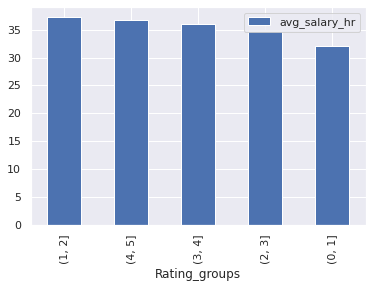

In [ ]:
df.groupby(['Rating_groups'])['avg_salary_hr'].mean().reset_index().sort_values('avg_salary_hr', ascending = False).set_index('Rating_groups').plot(kind = 'bar')

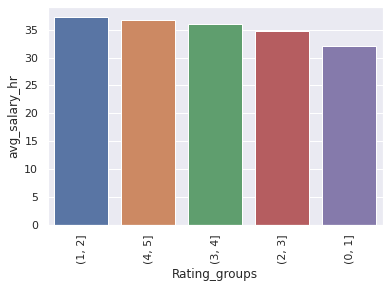

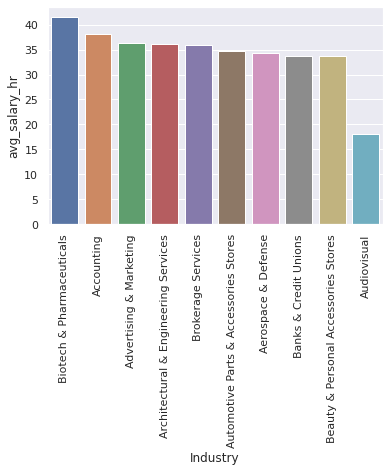

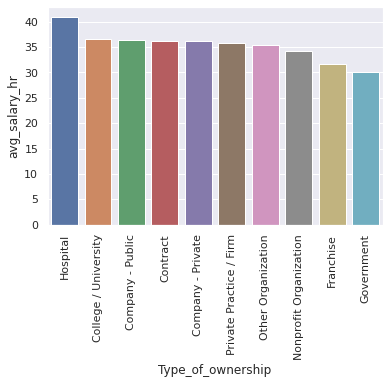

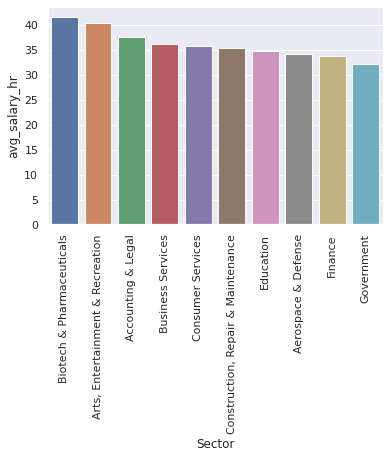

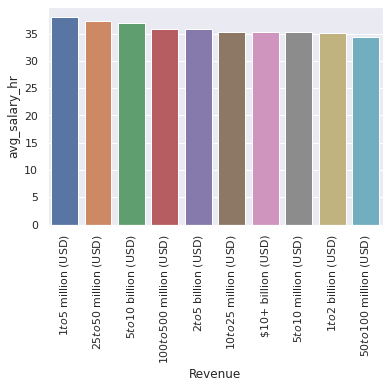

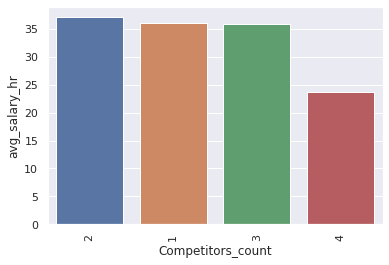

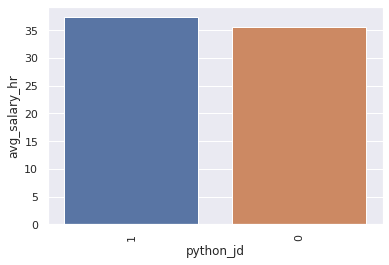

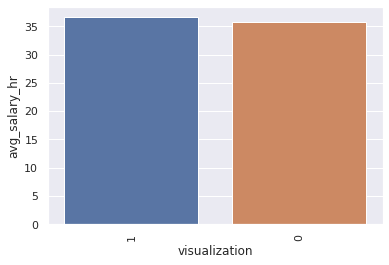

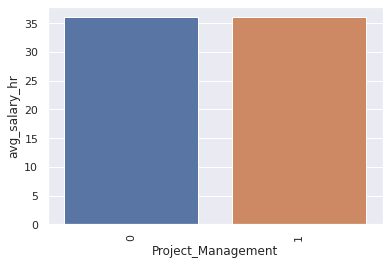

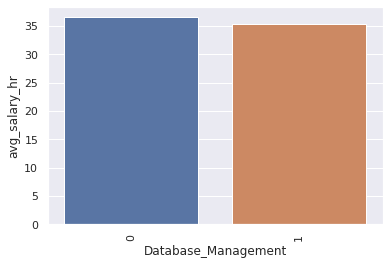

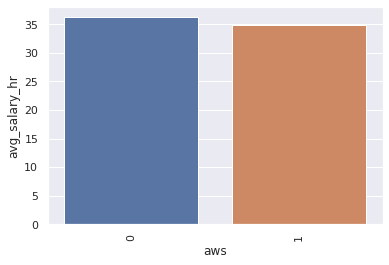

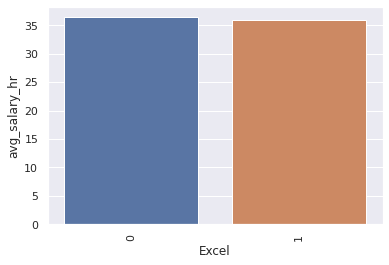

In [ ]:
for i in [i for i in df_pivots.columns.tolist() if i != 'avg_salary_hr']:
    k = 'avg_salary_hr'
    df_2 = df[(df[i].astype(str) != '-1')]
    chart_df = df_2.groupby([i])[k].mean().reset_index()[:10].sort_values(k, ascending = False).set_index(i)
    chart_df.index = chart_df.index.astype('str')
    chart= sns.barplot(x=chart_df.index, y=chart_df[k])
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [ ]:
for i in [i for i in df_pivots.columns.tolist() if i != 'avg_salary_hr']:
#     if i != 'avg_salary_hr':
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary_hr').sort_values('avg_salary_hr', ascending = False))
    #'desc_len','Type_of_ownership' 'desc_len',,, 

Rating_groups
               avg_salary_hr
Rating_groups               
(1, 2]             37.196429
(4, 5]             36.714222
(3, 4]             35.939871
(2, 3]             34.789030
(0, 1]             32.125000
Industry
                                           avg_salary_hr
Industry                                                
Drug & Health Stores                           47.625000
Education Training Services                    46.416667
Health Care Products Manufacturing             44.900000
Sports & Recreation                            44.083333
Gambling                                       44.000000
News Outlet                                    43.500000
Transportation Equipment Manufacturing         42.500000
Electrical & Electronic Manufacturing          42.333333
Utilities                                      41.625000
Biotech & Pharmaceuticals                      41.553030
Real Estate                                    40.458333
Internet                         

In [ ]:
pd.pivot_table(df_pivots, index='Revenue', columns='python_jd',values='avg_salary_hr', aggfunc ='count')

python_jd,0,1
Revenue,,
$1 to $2 billion (USD),65,22
$1 to $5 million (USD),82,29
$10 to $25 million (USD),94,38
$10+ billion (USD),133,56
$100 to $500 million (USD),158,60
$2 to $5 billion (USD),97,32
$25 to $50 million (USD),76,33
$5 to $10 billion (USD),36,20
$5 to $10 million (USD),57,15


In [ ]:
from wordcloud import WordCloud, ImageColorGenerator , STOPWORDS
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [ ]:
df.columns



Index(['Unnamed: 0', 'Unnamed: 0.1', 'Job_Title', 'Salary_Estimate',
       'Job_Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type_of_ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply', 'Min_salary', 'min_salary', 'Max_salary',
       'max_salary', 'avg_salary', 'Avg_salary', 'Job_state', 'Job_city',
       'headquarters_city', 'Same_state_hq_jl', 'Age', 'python_jd', 'Sql',
       'aws', 'visualization', 'Project_Management', 'Database_Management',
       'Excel', 'job_simp', 'Seniority', 'desc_len', 'Competitors_count',
       'Min_salary_hr', 'Max_salary_hr', 'avg_salary_hr', 'Rating_groups'],
      dtype='object')

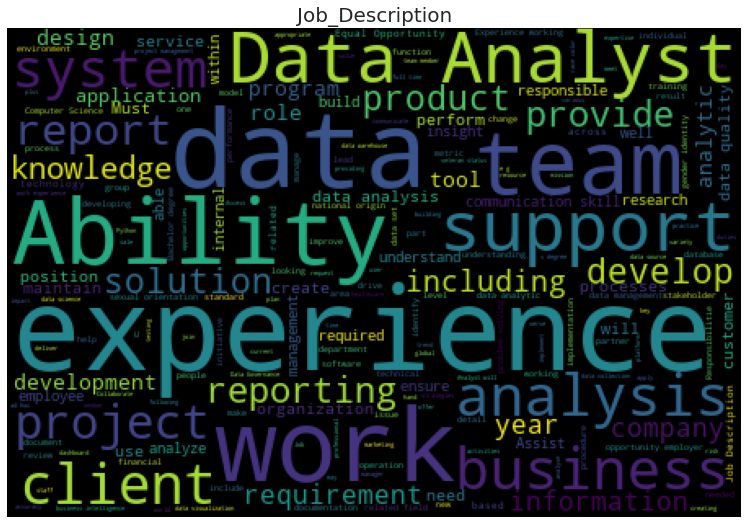

In [ ]:
Job_Description=df['Job_Description'][~pd.isnull(df['Job_Description'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(Job_Description))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(df['Job_Description'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

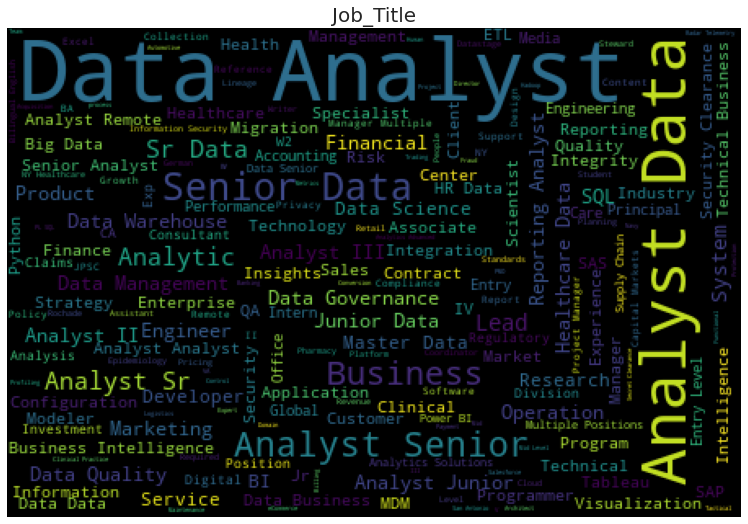

In [ ]:
Job_Description=df['Job_Title'][~pd.isnull(df['Job_Title'])]
wordCloud = WordCloud(width=450,height= 300).generate(' '.join(Job_Description))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(df['Job_Title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()

In [ ]:
df.to_csv("Data_analyst_cleaned.csv")